<a href="https://colab.research.google.com/github/yuma-gri/QM2/blob/main/pollution_2019_figs_cleanedv2_qm2_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import io
import zipfile
import requests
import pandas as pd

# Make pandas show EVERYTHING
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)


def load_full_pm25_summary(zip_url):
    """
    Downloads LAEI ZIP file and returns the FULL PM2.5 Summary sheet as a DataFrame
    """
    # Download ZIP
    response = requests.get(zip_url)
    response.raise_for_status()

    # Open ZIP
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Find Excel file
        excel_name = [f for f in z.namelist() if f.lower().endswith(".xlsx")][0]

        # Load Excel
        excel_bytes = io.BytesIO(z.read(excel_name))
        df = pd.read_excel(excel_bytes, sheet_name="PM2.5 Summary")

    return df


# ================= URLs =================

url_2019 = (
    "https://data.london.gov.uk/download/"
    "london-atmospheric-emissions-inventory--laei--2019/"
    "17d21cd1-892e-4388-9fea-b48c1b61ee3c/"
    "LAEI-2019-Emissions-Summary-including-Forecast.zip"
)

url_2022 = (
    "https://data.london.gov.uk/download/2lg5g/4ql/"
    "LAEI2022-Emissions-Summary-Excel.zip"
)

# ================= Load FULL PM2.5 sheets =================

pm25_2019_full = load_full_pm25_summary(url_2019)
pm25_2022_full = load_full_pm25_summary(url_2022)


In [3]:

result_2022 = pm25_2022_full.iloc[[6, 77], 11:]

result_2022

,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
6,Row Labels,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Non-GLA,Westminster,City of London,Grand Total
77,Grand Total,77.270519,133.32283,104.686048,114.930944,135.640101,68.227314,150.942346,124.123021,141.448322,114.115291,73.186536,54.910216,55.561304,76.622391,121.692274,305.30683,109.215748,64.850672,48.600211,66.996553,73.033421,85.775661,67.93263,89.734112,90.382563,78.773491,76.900867,77.950957,67.966899,67.45479,85.692503,731.589474,185.498001,26.586187,3946.921028


In [4]:

result_2019 = pm25_2019_full.iloc[[6, 71], 11:]

result_2019

,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
6,Row Labels,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City,City of Westminster,Croydon,Ealing,Enfield,Greenwich,Hackney,Hammersmith and Fulham,Haringey,Harrow,Havering,Hillingdon,Hounslow,Islington,Kensington and Chelsea,Kingston,Lambeth,Lewisham,Merton,Newham,Redbridge,Richmond,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Non GLA,Grand Total
71,Grand Total,89.144025,146.784771,126.825466,112.133591,131.074954,98.035241,45.171228,184.392969,129.358847,128.534116,140.493582,115.231368,55.969963,60.478756,63.396073,80.469973,121.357687,247.134244,131.381635,56.890515,60.601096,69.384975,74.373947,70.859049,73.560127,121.318747,99.834475,77.401403,75.588366,73.020844,103.639316,75.547046,91.066451,679.499192,4009.95404


In [5]:
#choropleth 2019 pollution

import warnings

import geopandas as gpd
import libpysal as lps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import esda

In [6]:
geojson_url = "https://hub.arcgis.com/api/v3/datasets/0a92a355a8094e0eb20a7a66cf4ca7cf_10/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1"
output_filename = "london_boroughs.geojson"

In [7]:
import requests

# Download the GeoJSON file
response = requests.get(geojson_url)
response.raise_for_status()  # Raise an exception for bad status codes

with open(output_filename, 'wb') as f:
    f.write(response.content)

gdf = gpd.read_file(output_filename)

In [8]:
np.random.seed(12345)
import esda

In [ ]:
csv_url = "https://data.london.gov.uk/download/2lg5g/4ql/LAEI2022-Emissions-Summary-Excel.zip"
output_filename = "pollution_2019.csv"

In [ ]:
pm25_2019_full.to_csv(output_filename, index=False)

In [9]:
pm25_2019_borough = result_2019.T.reset_index()
pm25_2019_borough.columns = pm25_2019_borough.iloc[0]
pm25_2019_borough = pm25_2019_borough[1:]
pm25_2019_borough = pm25_2019_borough.rename(columns={'Row Labels': 'Borough', 'Grand Total': 'PM2.5_2019'})
pm25_2019_borough = pm25_2019_borough[~pm25_2019_borough['Borough'].isin(['Row Labels', 'Non-GLA', 'City of London', 'Grand Total'])]
pm25_2019_borough['PM2.5_2019'] = pd.to_numeric(pm25_2019_borough['PM2.5_2019'])
pm25_2019_borough.head()

,Unnamed: 11,Borough,PM2.5_2019
1,Unnamed: 12,Barking and Dagenham,89.144025
2,Unnamed: 13,Barnet,146.784771
3,Unnamed: 14,Bexley,126.825466
4,Unnamed: 15,Brent,112.133591
5,Unnamed: 16,Bromley,131.074954


In [10]:
pm25_2019_borough

,Unnamed: 11,Borough,PM2.5_2019
1,Unnamed: 12,Barking and Dagenham,89.144025
2,Unnamed: 13,Barnet,146.784771
3,Unnamed: 14,Bexley,126.825466
4,Unnamed: 15,Brent,112.133591
5,Unnamed: 16,Bromley,131.074954
6,Unnamed: 17,Camden,98.035241
7,Unnamed: 18,City,45.171228
8,Unnamed: 19,City of Westminster,184.392969
9,Unnamed: 20,Croydon,129.358847
10,Unnamed: 21,Ealing,128.534116


In [11]:
#Standardize borough names: inspect unique values in 'Borough' column of the pm25_2019_borough DataFrame
pm25_2019_borough['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City', 'City of Westminster', 'Croydon', 'Ealing',
       'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
       'Islington', 'Kensington and Chelsea', 'Kingston', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond',
       'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
       'Wandsworth', 'Non GLA'], dtype=object)

In [12]:
#Inspect unique values in 'BOROUGH' column of the gdf DataFrame to compare with the above to identify inconsistencies
gdf['BOROUGH'].unique()

array(['Bromley', 'Lewisham', 'Wandsworth', 'Merton', 'Redbridge',
       'Barnet', 'City of London', 'Sutton', 'Southwark', 'Ealing',
       'Brent', 'Croydon', 'Richmond upon Thames', 'Hillingdon',
       'Haringey', 'Kensington & Chelsea', 'Kingston upon Thames',
       'Waltham Forest', 'Barking & Dagenham', 'Newham', 'Enfield',
       'Hammersmith & Fulham', 'Havering', 'Greenwich', 'Hackney',
       'Westminster', 'Camden', 'Tower Hamlets', 'Hounslow', 'Harrow',
       'Bexley', 'Islington', 'Lambeth'], dtype=object)

In [13]:
#Apply necessary transformations to the 'Borough' column of pm25_2019_borough to standardize them and ensure consistency with the gdf DataFrame for merging later on
pm25_2019_borough['Borough'] = pm25_2019_borough['Borough'].replace({
    'Barking and Dagenham': 'Barking & Dagenham',
    'Hammersmith and Fulham': 'Hammersmith & Fulham',
    'Kensington and Chelsea': 'Kensington & Chelsea',
    'Kingston': 'Kingston upon Thames',
    'Richmond': 'Richmond upon Thames'
})

print("Unique borough names in pm25_2019_borough after standardization:")
print(pm25_2019_borough['Borough'].unique())

Unique borough names in pm25_2019_borough after standardization:
['Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden' 'City'
 'City of Westminster' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Non GLA']


In [14]:
#Double check all naming inconsistencies have been resolved (specifically excluding 'City of London')
diff_pm25_not_in_gdf = set(pm25_2019_borough['Borough'].unique()) - set(gdf['BOROUGH'].unique())
diff_gdf_not_in_pm25 = set(gdf['BOROUGH'].unique()) - set(pm25_2019_borough['Borough'].unique())

print("Borough names in pm25_2019_borough but not in gdf:", diff_pm25_not_in_gdf)
print("Borough names in gdf but not in pm25_2019_borough:", diff_gdf_not_in_pm25)

Borough names in pm25_2019_borough but not in gdf: {'City', 'City of Westminster', 'Non GLA'}
Borough names in gdf but not in pm25_2019_borough: {'City of London', 'Westminster'}


In [17]:
#Merge 2019 PM2.5 data with geographical data (left merge between gdf and pm25_2022_borough using standardized borough names as keys then drop redundant 'Borough' column)
gdf_merged_2019 = gdf.merge(pm25_2019_borough, left_on='BOROUGH', right_on='Borough', how='left')
gdf_merged_2019 = gdf_merged_2019.drop(columns=['Borough'])
gdf_merged_2019.head()

BOROUGH NUMBER_  CODE      HECTARES                  DESCRIPT0       X  \
0     Bromley      19  00AF  15014.515249  CIVIL ADMINISTRATION AREA  542896   
1    Lewisham      07  00AZ   3532.340464  CIVIL ADMINISTRATION AREA  537667   
2  Wandsworth      10  00BJ   3522.003234  CIVIL ADMINISTRATION AREA  526129   
3      Merton      22  00BA   3760.919638  CIVIL ADMINISTRATION AREA  525475   
4   Redbridge      14  00BC   5645.008264  CIVIL ADMINISTRATION AREA  543914   

        Y  AREA  OBJECTID                 FILE_NAME   Shape__Area  \
0  165656   0.0         1  GREATER_LONDON_AUTHORITY  1.501452e+08   
1  174002   0.0         2  GREATER_LONDON_AUTHORITY  3.532340e+07   
2  174114   0.0         3  GREATER_LONDON_AUTHORITY  3.522003e+07   
3  169422   0.0         4  GREATER_LONDON_AUTHORITY  3.760920e+07   
4  189463   0.0         5  GREATER_LONDON_AUTHORITY  5.645008e+07   

   Shape__Length                              GlobalID  \
0   75909.142745  86b54395-dc20-4e52-bc8c-7b79188f035f   
1   40992.749346  84f88d72-30c1-47b6-bc71-163246413f0d   
2   37353.846507  617038fb-5459-4133-96ae-1743ba48321c   
3   32293.919848  6362d58b-7052-4655-a812-3487752e770e   
4   45688.184397  3d6ac4f8-be2c-4a89-a684-e50e11c602e9   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [18]:
#Check for missing values in 'PM2.5_2022' column
gdf_merged_2019['PM2.5_2019'].isnull().sum()

np.int64(2)

In [19]:
#Display rows in gdf_merged_2022 to identify missing PM2.5 data
gdf_merged_2019[gdf_merged_2019['PM2.5_2019'].isnull()]

BOROUGH NUMBER_  CODE     HECTARES                  DESCRIPT0  \
6   City of London      00  00AA   315.281290  CIVIL ADMINISTRATION AREA   
25     Westminster      01  00BK  2202.868487  CIVIL ADMINISTRATION AREA   

         X       Y  AREA  OBJECTID                 FILE_NAME   Shape__Area  \
6   532464  181220   0.0         7  GREATER_LONDON_AUTHORITY  3.152813e+06   
25  527746  180994   0.0        27  GREATER_LONDON_AUTHORITY  2.202868e+07   

    Shape__Length                              GlobalID  \
6     9651.890663  417f3ab6-bfb7-4770-827f-80526d360a25   
25   27150.164179  cbd0a4bc-0fca-4602-a844-9e028de43a83   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [20]:
#'City of London' is the only borough with a missing PM2.5 value (intentionally excluded in the initial data preparation), fill its 'PM2.5_2022' value with 0. This approach aligns with the treatment of the 2019 data and is reasonable given the negligible emissions of the City of London in this context.
gdf_merged_2019['PM2.5_2019'] = gdf_merged_2019['PM2.5_2019'].fillna(0)
gdf_merged_2019[gdf_merged_2019['BOROUGH'] == 'City of London']

BOROUGH NUMBER_  CODE   HECTARES                  DESCRIPT0       X  \
6  City of London      00  00AA  315.28129  CIVIL ADMINISTRATION AREA  532464   

        Y  AREA  OBJECTID                 FILE_NAME   Shape__Area  \
6  181220   0.0         7  GREATER_LONDON_AUTHORITY  3.152813e+06   

   Shape__Length                              GlobalID  \
6    9651.890663  417f3ab6-bfb7-4770-827f-80526d360a25   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [21]:
#Double check for null values in the column after filling the 'City of London' entry.
gdf_merged_2019['PM2.5_2019'].isnull().sum()

np.int64(0)

In [22]:
#Perform spatial join: use gpd.sjoin with the specified DataFrames, join type, predicate, and suffixes for overlapping columns.
sj_gdf = gpd.sjoin(
    gdf,
    gdf_merged_2019,
    how="inner",
    predicate="intersects",
    lsuffix="left",
    rsuffix="right"
)
sj_gdf.head()

BOROUGH_left NUMBER__left CODE_left  HECTARES_left  \
0      Bromley           19      00AF   15014.515249   
0      Bromley           19      00AF   15014.515249   
0      Bromley           19      00AF   15014.515249   
0      Bromley           19      00AF   15014.515249   
0      Bromley           19      00AF   15014.515249   

              DESCRIPT0_left  X_left  Y_left  AREA_left  OBJECTID_left  \
0  CIVIL ADMINISTRATION AREA  542896  165656        0.0              1   
0  CIVIL ADMINISTRATION AREA  542896  165656        0.0              1   
0  CIVIL ADMINISTRATION AREA  542896  165656        0.0              1   
0  CIVIL ADMINISTRATION AREA  542896  165656        0.0              1   
0  CIVIL ADMINISTRATION AREA  542896  165656        0.0              1   

             FILE_NAME_left  Shape__Area_left  Shape__Length_left  \
0  GREATER_LONDON_AUTHORITY      1.501452e+08        75909.142745   
0  GREATER_LONDON_AUTHORITY      1.501452e+08        75909.142745   
0  GREATER_LONDON_AUTHORITY      1.501452e+08        75909.142745   
0  GREATER_LONDON_AUTHORITY      1.501452e+08        75909.142745   
0  GREATER_LONDON_AUTHORITY      1.501452e+08        75909.142745   

                          GlobalID_left  \
0  86b54395-dc20-4e52-bc8c-7b79188f035f   
0  86b54395-dc20-4e52-bc8c-7b79188f035f   
0  86b54395-dc20-4e52-bc8c-7b79188f035f   
0  86b54395-dc20-4e52-bc8c-7b79188f035f   
0  86b54395-dc20-4e52-bc8c-7b79188f035f   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [23]:
#Calculate mean PM2.5 emissions for each borough using the PM2.5_2022 column, group results by BOROUGH_left from the sj_gdf GeoDataFrame, storing the result in mean_pm25_gb
mean_pm25_gb = sj_gdf.groupby('BOROUGH_left')['PM2.5_2019'].mean()
mean_pm25_gb.name = 'PM2.5_2019_Mean'
mean_pm25_gb

,PM2.5_2019_Mean
BOROUGH_left,
Barking & Dagenham,112.285295
Barnet,106.885539
Bexley,116.726700
Brent,85.879693
Bromley,103.330285
Camden,68.177170
City of London,58.062168
Croydon,96.277744
Ealing,126.688719


In [24]:
#Merge calculated mean PM2.5 emissions for each borough (mean_pm25_gb) back into the gdf GeoDataFrame
gdf = gdf.merge(mean_pm25_gb, left_on='BOROUGH', right_on='BOROUGH_left', how='left')
gdf.head()

BOROUGH NUMBER_  CODE      HECTARES                  DESCRIPT0       X  \
0     Bromley      19  00AF  15014.515249  CIVIL ADMINISTRATION AREA  542896   
1    Lewisham      07  00AZ   3532.340464  CIVIL ADMINISTRATION AREA  537667   
2  Wandsworth      10  00BJ   3522.003234  CIVIL ADMINISTRATION AREA  526129   
3      Merton      22  00BA   3760.919638  CIVIL ADMINISTRATION AREA  525475   
4   Redbridge      14  00BC   5645.008264  CIVIL ADMINISTRATION AREA  543914   

        Y  AREA  OBJECTID                 FILE_NAME   Shape__Area  \
0  165656   0.0         1  GREATER_LONDON_AUTHORITY  1.501452e+08   
1  174002   0.0         2  GREATER_LONDON_AUTHORITY  3.532340e+07   
2  174114   0.0         3  GREATER_LONDON_AUTHORITY  3.522003e+07   
3  169422   0.0         4  GREATER_LONDON_AUTHORITY  3.760920e+07   
4  189463   0.0         5  GREATER_LONDON_AUTHORITY  5.645008e+07   

   Shape__Length                              GlobalID  \
0   75909.142745  86b54395-dc20-4e52-bc8c-7b79188f035f   
1   40992.749346  84f88d72-30c1-47b6-bc71-163246413f0d   
2   37353.846507  617038fb-5459-4133-96ae-1743ba48321c   
3   32293.919848  6362d58b-7052-4655-a812-3487752e770e   
4   45688.184397  3d6ac4f8-be2c-4a89-a684-e50e11c602e9   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

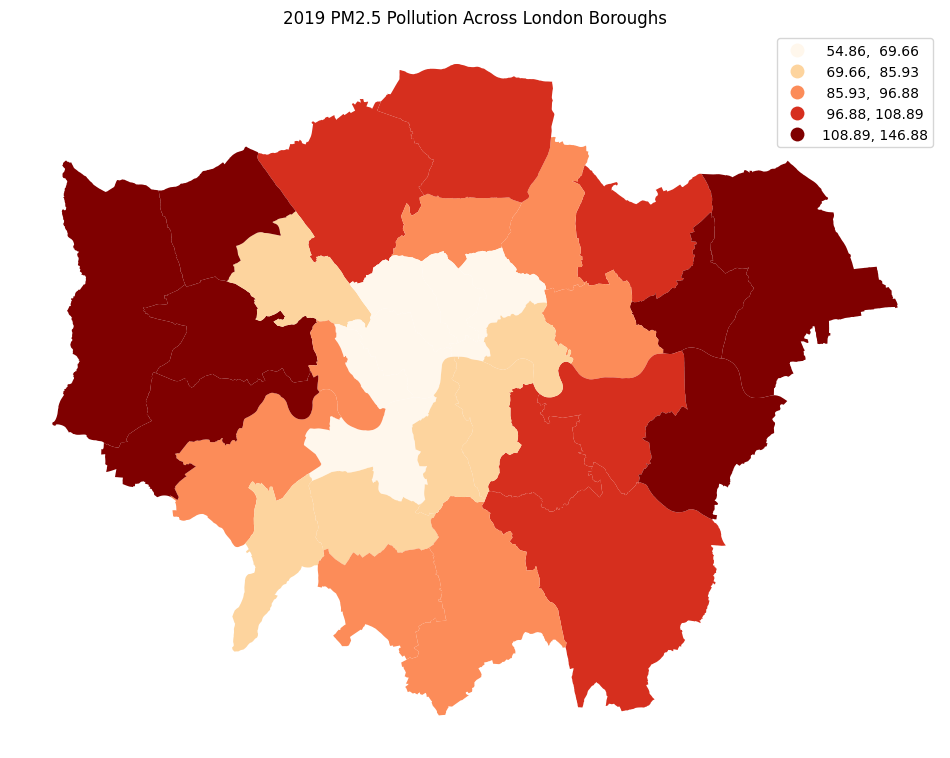

In [25]:
#Create a choropleth map using the gdf DataFrame, specifying plot size, column mapping, color scheme, legend, axis removal, and title
import matplotlib.pyplot as plt
import mapclassify as mc

fig, ax = plt.subplots(1, figsize=(12, 10), subplot_kw={'aspect': 'equal'})
gdf.plot(column='PM2.5_2019_Mean', scheme='Quantiles', k=5, cmap='OrRd', legend=True, ax=ax)
ax.set_axis_off()
plt.title('2019 PM2.5 Pollution Across London Boroughs')
plt.show()

In [ ]:
#moran I 2019 pollution

In [27]:
df = gdf_merged_2019 # Use gdf_merged which contains the PM2.5 data
wq = lps.weights.Queen.from_dataframe(df, use_index=False, silence_warnings=True) #spatial weight matrix
wq.transform = "r" #row standardisation

In [29]:
#spatial lag of pm2.5 values
y = df["PM2.5_2019"]
ylag = lps.weights.lag_spatial(wq, y)

In [30]:
ylag

array([ 98.70617391, 106.38350106,  59.40004342,  87.44101271,
       101.84187628,  98.90569213,  66.35676395,  90.76798293,
        75.98945317, 126.31963985,  82.12913609,  88.00746819,
        88.07795424, 113.46190801,  95.62018634,  65.91969951,
        78.7622065 ,  96.2025682 , 116.91354873,  89.89436533,
        95.24263003, 100.18638211, 105.26798853, 107.14359287,
        70.13194954,  72.70172097,  63.20082499,  73.16124901,
       128.3871299 , 158.64668045, 114.20200854,  54.35031942,
        71.5212494 ])

In [32]:
import mapclassify as mc

ylagq5 = mc.Quantiles(ylag, k=5) #classify sptial lag into quantiles (same as choropleth)

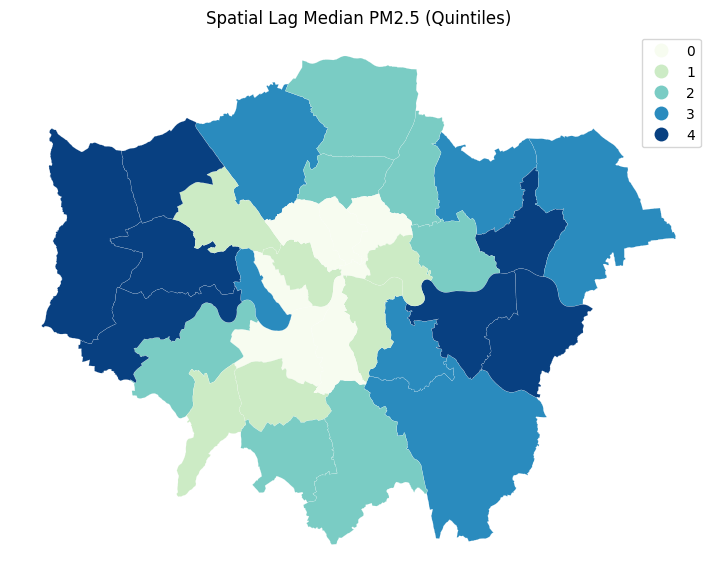

In [33]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(
    column="cl",
    categorical=True,
    k=5,
    cmap="GnBu",
    linewidth=0.1,
    ax=ax,
    edgecolor="white",
    legend=True,
)
ax.set_axis_off()
plt.title("Spatial Lag Median PM2.5 (Quintiles)")

plt.show()

#0 smallest spatial lag to 4 most spatial lag

In [34]:
wq.transform = "r"
lag_pm25 = lps.weights.lag_spatial(wq, df["PM2.5_2019"]) # Use the correct column name for PM2.5

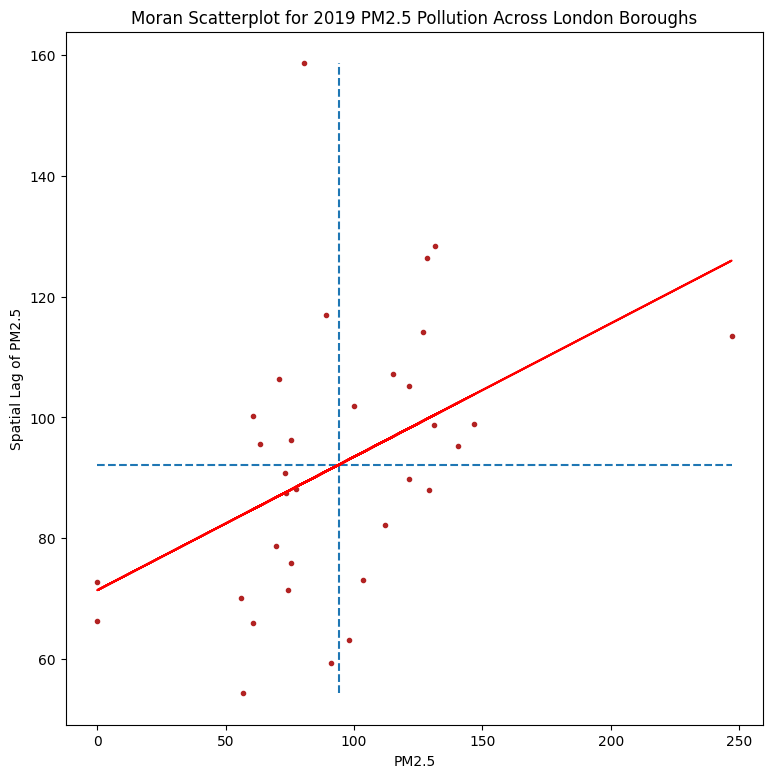

In [35]:
#moran scatterplot

pm25 = df["PM2.5_2019"]
b, a = np.polyfit(pm25, lag_pm25, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(pm25, lag_pm25, ".", color="firebrick")

# dashed vert at mean of the price
plt.vlines(pm25.mean(), lag_pm25.min(), lag_pm25.max(), linestyle="--")
# dashed horizontal at mean of lagged price
plt.hlines(lag_pm25.mean(), pm25.min(), pm25.max(), linestyle="--")

# red line of best fit using global I as slope
plt.plot(pm25, a + b * pm25, "r")
plt.title("Moran Scatterplot for 2019 PM2.5 Pollution Across London Boroughs")
plt.ylabel("Spatial Lag of PM2.5")
plt.xlabel("PM2.5")
plt.show()

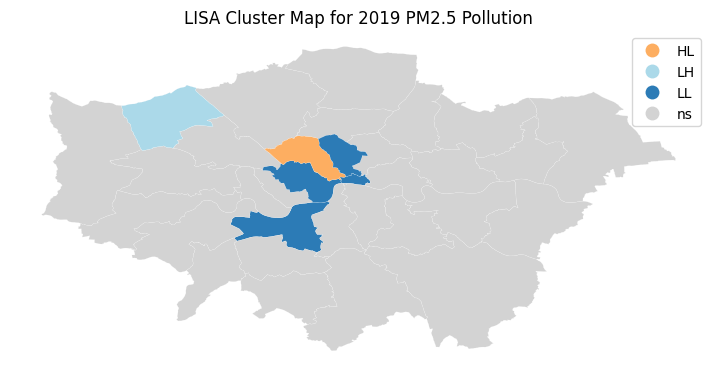

In [63]:
#visualise clusters with LISA map

import splot.esda
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
splot.esda.lisa_cluster(li, df, p=0.05, ax=ax)
ax.set_axis_off()
plt.title("LISA Cluster Map for 2019 PM2.5 Pollution")
plt.show()